all the data was in an archive with the patients numbers as folders and inside the tumor and non tumor patches, we take all these out and merge them in 2 folders positive and negative

In [7]:
import os
import shutil

src = '../data/raw/'
dst = '../data/clean'

os.makedirs(f'{dst}/0', exist_ok=True)
os.makedirs(f'{dst}/1', exist_ok=True)

for patient_dir in os.listdir(src):
    patient_path = os.path.join(src, patient_dir)
    if not os.path.isdir(patient_path): continue

    zero_dir = os.path.join(patient_path,"0")
    one_dir = os.path.join(patient_path,"1")

    dir_name = os.path.splitext(patient_dir)[0]
    if dir_name.isdigit():
        for file in os.listdir(zero_dir):
            if file not in os.path.join(dst, "0"):
                filepath = os.path.join(zero_dir, file)
                shutil.move(filepath, os.path.join(dst, "0") )

        
        for file in os.listdir(one_dir):
            if file not in os.path.join(dst, "1"):
                filepath = os.path.join(one_dir, file)
                shutil.move(filepath, os.path.join(dst, "1") )

now we can start spliting the data and analizing it 

In [ ]:
#the imports
import numpy as np
import matplotlib.pyplot as plt
import cv2

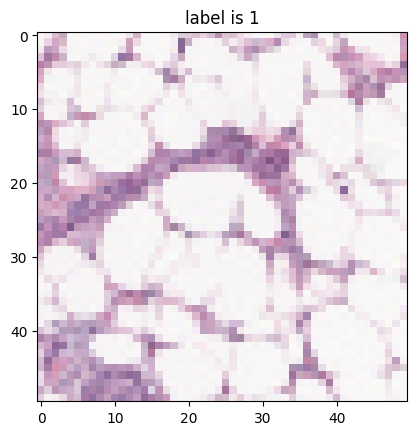

In [85]:
#let's get an image
def get_random_image():
    dataset = []
    for label in ["0","1"]:
        folder = os.path.join(dst,label)
        images_path = [os.path.join(folder,f) for f in os.listdir(folder)]
        dataset.extend((path, label) for path in images_path)

    idx = np.random.choice(len(dataset))
    label = dataset[idx][1]
    im = dataset[idx][0]
    im = cv2.imread(im)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

    return im, label

def plot_random_image():
    im, label = get_random_image()
    plt.imshow(im)
    plt.title(f"label is {label}")

plot_random_image()


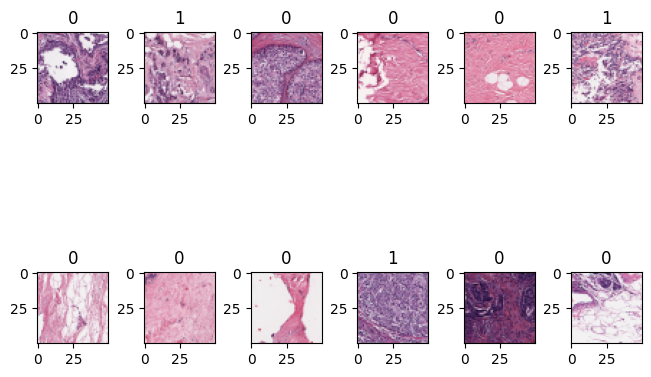

In [87]:

#let's see some many random images 
def plot_random_images(num_images=12):
    dataset = []
    for label in ["0","1"]:
        folder = os.path.join(dst,label)
        images_path = [os.path.join(folder,f) for f in os.listdir(folder)]
        dataset.extend((path, label) for path in images_path)

    plt.figure(layout='constrained')

    sample = np.random.choice(len(dataset), size=num_images)
    for i,idx in enumerate(sample):
        image_path, label = dataset[idx]
        im = cv2.imread(image_path)
        im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

        plt.subplot(2,num_images//2, i+1)
        plt.imshow(im_rgb)
        plt.title(label)
    
    plt.show()

plot_random_images()

In [88]:
im, label = get_random_image()
im.size

7500